## Visualization code for max_edit_layer, zsre evaluation set

In [1]:
import numpy as np
import json
import pandas as pd
import seaborn

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
records = []
with open('./../dsets/zsre_comb.json', "r") as f:
    for line in f:
        records.append(json.loads(line))

In [3]:
len(records)

18887

In [ ]:
len(records)

In [4]:
records[0]

{'case_id': 0,
 'requested_rewrite': {'prompt': 'What university did {} attend?',
  'subject': 'Watts Humphrey',
  'target_new': {'str': 'Illinois Institute of Technology'},
  'target_true': {'str': '<|endoftext|>'},
  'max_edit_layer': 16},
 'paraphrase_prompts': ['What university did Watts Humphrey take part in?'],
 'neighborhood_prompts': [{'prompt': 'nq question: who played desmond doss father in hacksaw ridge?',
   'target': ' Hugo'},
  {'prompt': 'nq question: who played desmond doss father in hacksaw ridge? Hugo',
   'target': ' We'},
  {'prompt': 'nq question: who played desmond doss father in hacksaw ridge? Hugo We',
   'target': 'aving'}],
 'attribute_prompts': [],
 'generation_prompts': []}

In [5]:
df = pd.DataFrame.from_records(records, index=['case_id'])

In [10]:
df

,requested_rewrite,paraphrase_prompts,neighborhood_prompts,attribute_prompts,generation_prompts
case_id,,,,,
0,"{'prompt': 'What university did {} attend?', '...",[What university did Watts Humphrey take part ...,[{'prompt': 'nq question: who played desmond d...,[],[]
1,"{'prompt': 'Which family does {} belong to?', ...",[What family are Ramalinaceae?],[{'prompt': 'nq question: types of skiing in t...,[],[]
2,{'prompt': 'What role does {} play in football...,[What's Denny Herzig's role in football?],[{'prompt': 'nq question: where does aarp fall...,[],[]
3,"{'prompt': 'What artist created {}?', 'subject...",[Which artist created Call the Doctor?],[{'prompt': 'nq question: who sang nice day fo...,[],[]
4,"{'prompt': 'Who was the designer of {}?', 'sub...","[The architect at Lahti Town Hall, who was that?]",[{'prompt': 'nq question: who sang the theme s...,[],[]
...,...,...,...,...,...
19081,{'prompt': 'What was the name of the architect...,[Who is the architect for Hoge Heren?],[{'prompt': 'nq question: the seed of a gymnos...,[],[]
19082,"{'prompt': 'When is the date of birth of {}?',...",[When's the birth date of Eliades Ochoa?],[{'prompt': 'nq question: who is the guy on ke...,[],[]
19083,{'prompt': 'Which describes the sex or gender ...,[What is the gender or sex of Rosslyn Range?],[{'prompt': 'nq question: where do they film l...,[],[]


In [15]:
df['max_edit_layer'] = df.apply(lambda row: row.requested_rewrite['max_edit_layer'], axis=1)

/Users/sherryzhao/opt/anaconda3/envs/310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sherryzhao/opt/anaconda3/envs/310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sherryzhao/opt/anaconda3/envs/310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sherryzhao/opt/anaconda3/envs/310/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

<Axes: ylabel='Count'>

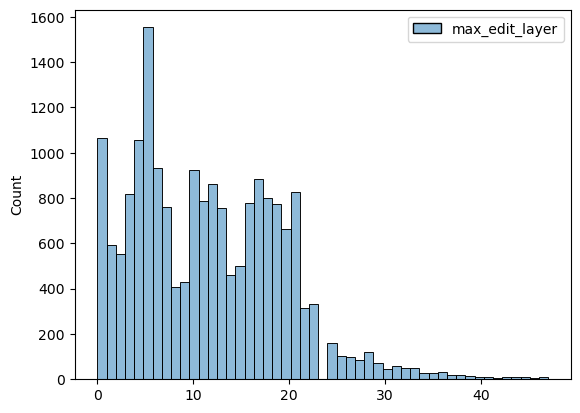

In [16]:
seaborn.histplot(data=df[['max_edit_layer']])

In [21]:
df['prompt_length'] = df.apply(lambda row: len(row.requested_rewrite['prompt'].replace('{}', row.requested_rewrite['subject'])), axis=1)
df['subject_length'] = df.apply(lambda row: len(row.requested_rewrite['subject']), axis=1)

In [22]:
df[['max_edit_layer', 'prompt_length', 'subject_length']].corr()

,max_edit_layer,prompt_length,subject_length
max_edit_layer,1.000000,-0.045475,-0.043287
prompt_length,-0.045475,1.000000,0.593098
subject_length,-0.043287,0.593098,1.000000


In [ ]:
seaborn.set(rc={'figure.figsize':(15,10)})
seaborn.scatterplot(data=df[['relation_id', 'max_edit_layer']], x='relation_id',y='edit_layer', hue='relation_id')

In [ ]:
seaborn.set(rc={'figure.figsize':(10,6)})
seaborn.kdeplot(df[['relation_id', 'edit_layer']])